# Numpy 

There are many libraries for scientific computing in python, but NumPy (http://www.numpy.org/) is one of the most common and well established. NumPy gives a relatively efficient framework for manipulating fixed-type arrays, such as vectors, matrices, and tensors, as well as extensive libraries for common operations on those structures, such as computing data statistics, linear algebraic operations, and much more. Many of its core operations are similar to Matlab/Octave, although it is more flexible and Pythonic.

## Matplotlib

MatPlotLib (http://matplotlib.org/) is a library for generating plots and figures in Python, specifically modeled to mimic the capabilities of Matlab for generating easy visualizations. There are many alternative libraries for plotting data, some with featurs that matplotlib lacks, but matplotlib's simplicity and similarity to Matlab syntax and capabilities have made it fairly popular.

## Numpy Basics

Numpy is memory efficient, here is some code comparing numpy to a built in python object:

In [1]:
L = range(1000)
%timeit [i**2 for i in L]

272 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
import numpy as np
a = np.arange(1000)
%timeit a**2

1.26 µs ± 7.32 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Numpy arrays

To define one-dimensional arrays (vectors), we can use numpy's "array" object and pass it a list of values:

In [3]:
a = np.array([1,2,3,4,5,6,7])
# or equivalently, using Python iterables:
a = np.array( range(1,8) )
print (a)
print(a.ndim)

print(a.shape)

len(a)

[1 2 3 4 5 6 7]
1
(7,)


7

To make 2D arrays we do a list of lists representation

In [4]:

A = np.array( [[1,2,3,4],[5,6,7,8],[9,10,11,12]] )
print (A)
print(A.ndim)

print(A.shape)

len(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
(3, 4)


3

## Functions for arrays

We rarely input numbers one by one, so numpy provides functions to autofill arrays.

### Evenly spaced

In [5]:
a = np.arange(10) # 0 .. n-1  (!)
print(a)

b = np.arange(1, 9, 2) # start, end (exclusive), step
print(b)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 7]


### By number of points

In [6]:
c = np.linspace(0, 1, 6)   # start, end, num-points
print(c)

d = np.linspace(0, 1, 5, endpoint=False)
print(d)

[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8]


### Common arrays

In [8]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
print(a)



b = np.zeros((2, 2))
print(b)


c = np.eye(4)
print(c)



d = np.diag(np.array([1, 2, 3, 4,5]))
print(d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0.]
 [0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


### Random numbers

In [9]:
a = np.random.rand(4)       # uniform in [0, 1]
print(a)  


b = np.random.randn(4)      # Gaussian
print(b)  


np.random.seed(1234) 

[0.44921808 0.96599346 0.39838961 0.77509729]
[-0.57265656  1.69209038  0.27095508  1.4617862 ]


## Data types

dtype gives you the data type of the array

In [10]:
a = np.array([1, 2, 3])
print(a.dtype)


b = np.array([1., 2., 3.])
print(b.dtype)

c = np.array([1, 2, 3], dtype=float)
print(c.dtype)

int32
float64
float64


## Array per use case

### Linear algebra


For linear algebra-like operations will usually want "vectors" of size (m,1) or size (1,n) -- in other words, two-dimensional matrices. (Note: there is a numpy class "matrix" that is specialized to linear algebra, but you should be a bit careful mixing "array" and "matrix" objects; so for now we'll stick with arrays).

In [12]:
# A row vector can be created as:
b = np.array( [[1,2,3,4,5,6,7]])
print(b)
# and a column vector as
bT = np.array( [[1],[2],[3],[4],[5],[6],[7]] )
print(bT)
# that's pretty inconvient, so we usually just use the "transpose" operator:
bT = np.array( [[1,2,3,4,5,6,7]]).T
print(bT)

[[1 2 3 4 5 6 7]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


### Linspace and logspace

These are constructors that generate arrays with a certain pattern

In [14]:
b = np.linspace(1.0,7.0,4) # length-4 vector interpolating between 1.0 and 7.0
cd = np.logspace(0.0,2.0,7) # length-7 vector interpolating between 10^0 and 10^2 logarithmically
print (b)
print (cd)

[1. 3. 5. 7.]
[  1.           2.15443469   4.64158883  10.          21.5443469
  46.41588834 100.        ]


### Array indexing


Arrays can be indexed in simple and useful ways. The (i,j)th entry in a matrix is simply:


In [15]:


print ( "A[2,0]=" ,A[2,0]  ) # 3rd row, 1st column

A[2,0]= 9


Entire column or row

In [16]:
print ("A[0,:]=",A[0,:])
print ("A[:,1]=",A[:,1])
print( "A[2, [1,4]]=",A[2, [0,3]])
print("A[:, [1,4]]=\n",A[:, [0,3]])

A[0,:]= [1 2 3 4]
A[:,1]= [ 2  6 10]
A[2, [1,4]]= [ 9 12]
A[:, [1,4]]=
 [[ 1  4]
 [ 5  8]
 [ 9 12]]


### Arithmetic operators

In [17]:
print(a)
a=a+2
print (a)

[1 2 3]
[3 4 5]


In [18]:
print ("a + 2*c = ",a+2*c)

a + 2*c =  [ 5.  8. 11.]


You can add two vectors if they are the same size but you cannot add two vectors that are not the same size (unless one is a scalar):

In [19]:
try:
    print ("a + b = ",a+b ) # raises a ValueError exception
except:
    print ("Got exception!")

Got exception!


Operators are interpreted as elementwise, so that a*c is a vector:

In [20]:
print (a * c)

[ 3.  8. 15.]


Linear-algebraic operations are also defined for vectors and matrices:

In [21]:
a.dot(c.T)  # The dot product between vectors a and c
A.dot(b.T)  # The matrix-vector product of A and  c

array([ 50., 114., 178.])

## Visualization

To visualize data we use matplotlib. Let's enable plots

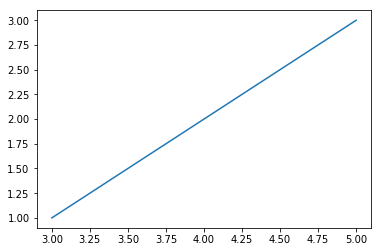

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt  # the tidy way
plt.plot(a, c)       # line plot    
plt.show()

### 1 D Plotting

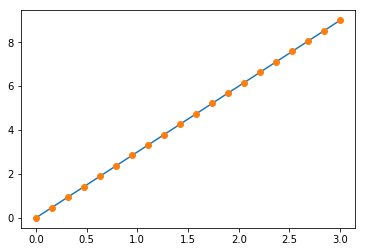

In [23]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

plt.plot(x, y, 'o')  # dot plot 

### 2D Arrays

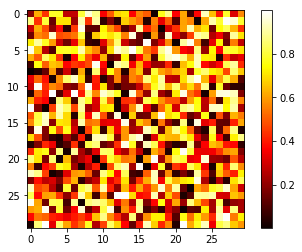

In [24]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    

plt.colorbar()    


### Multiple vectors

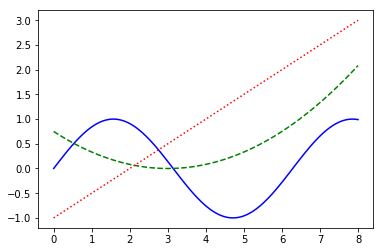

In [25]:
x_values = np.linspace(0,8,100)
y1 = np.sin(x_values)         # sinusoidal function
y2 = (x_values - 3)**2 / 12   # a simple quadratic curve
y3 = 0.5*x_values - 1.0       # a simple linear function

plt.plot(x_values, y1, 'b-', x_values, y2, 'g--');  # plot two curves
plt.plot(x_values, y3, 'r:'); # add a curve to the plot

### Histograms

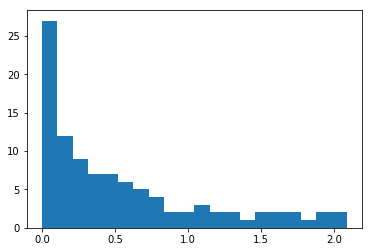

In [26]:
plt.hist(y2, bins=20);

### Subplots

It is often useful to put more than one plot together in a group; you can do this using the subplot function. There are various options; for example, "sharex" and "sharey" allow multiple plots to share a single axis range (or, you can set it manually, of course).

I often find it necessary to also change the geometry of the figure for multiple subplots -- although this is more generally useful as well, if you have a plot that looks better wider and shorter, for example.

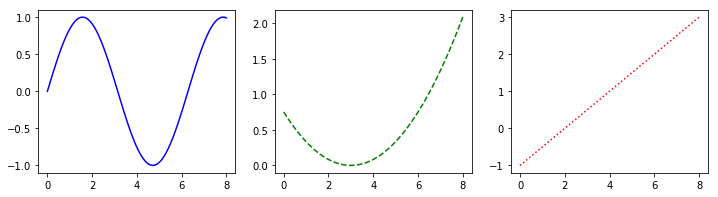

In [27]:
plt.rcParams['figure.figsize'] = (12.0, 3.0)
fig,ax = plt.subplots(1,3)      # make a 1 x 3 grid of plots:
ax[0].plot(x_values, y1, 'b-');   # plot y1 in the first subplot
ax[1].plot(x_values, y2, 'g--');  #   y2 in the 2nd
ax[2].plot(x_values, y3, 'r:');   #   and y3 in the last

plt.rcParams['figure.figsize'] = (6.0, 4.0);  # restore default plot size after